In [ ]:
# 📓 Notebook 01 – Exploração de Dados PETR4

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
# Configurações iniciais de visualização
plt.style.use('seaborn-v0_8')
sns.set(rc={'figure.figsize': (14,6)})

In [32]:
# Coleta de dados do Yahoo Finance
ticker = 'PETR4.SA'
df = yf.download(tickers=ticker, start='2019-01-01', end='2025-07-30', multi_level_index=False)

C:\Users\Ernane Domingues\AppData\Local\Temp\ipykernel_38080\1715943838.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers=ticker, start='2019-01-01', end='2025-07-30', multi_level_index=False)
[*********************100%***********************]  1 of 1 completed



In [33]:
# Renomeando o índice para coluna e resetando
print("\n📥 Dados brutos:")
df = df.reset_index()
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
df.set_index('Date', inplace=True)


📥 Dados brutos:


In [34]:
# Visualização dos dados
print("\n🔍 Primeiras linhas:")
print(df.head())


🔍 Primeiras linhas:
                Open      High       Low     Close     Volume
Date                                                         
2019-01-02  6.612076  7.095887  6.532908  7.054836  104534800
2019-01-03  7.025514  7.277682  6.978599  7.227835   95206400
2019-01-04  7.286481  7.312871  7.175057  7.248362   72119800
2019-01-07  7.286480  7.600224  7.242497  7.362717  121711900
2019-01-08  7.447750  7.453614  7.263022  7.318733   68761800


In [35]:
print("\n📊 Informações do DataFrame:")
df.info()


📊 Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1635 entries, 2019-01-02 to 2025-07-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1635 non-null   float64
 1   High    1635 non-null   float64
 2   Low     1635 non-null   float64
 3   Close   1635 non-null   float64
 4   Volume  1635 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 76.6 KB


In [36]:
print("\n📈 Estatísticas descritivas:")
print(df.describe())


📈 Estatísticas descritivas:
              Open         High          Low        Close        Volume
count  1635.000000  1635.000000  1635.000000  1635.000000  1.635000e+03
mean     16.610933    16.820114    16.399383    16.610167  6.149016e+07
std      10.140292    10.224311    10.058048    10.139960  3.610504e+07
min       3.353746     3.690030     3.287096     3.420397  9.356900e+06
25%       8.123638     8.207537     8.033592     8.105634  3.730300e+07
50%      12.632945    12.814975    12.347626    12.583873  5.373150e+07
75%      27.375457    27.729796    27.095885    27.443765  7.506315e+07
max      36.500250    36.623401    36.291839    36.471828  4.902304e+08


In [37]:
# Verificando valores nulos
df_nulls = df.isnull().sum()
print("\n🧹 Valores nulos por coluna:")
print(df_nulls)


🧹 Valores nulos por coluna:
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [38]:
# Remoção de valores nulos
if df.isnull().values.any():
    df = df.dropna()
    print("\n🧽 Dados limpos: valores nulos removidos.")

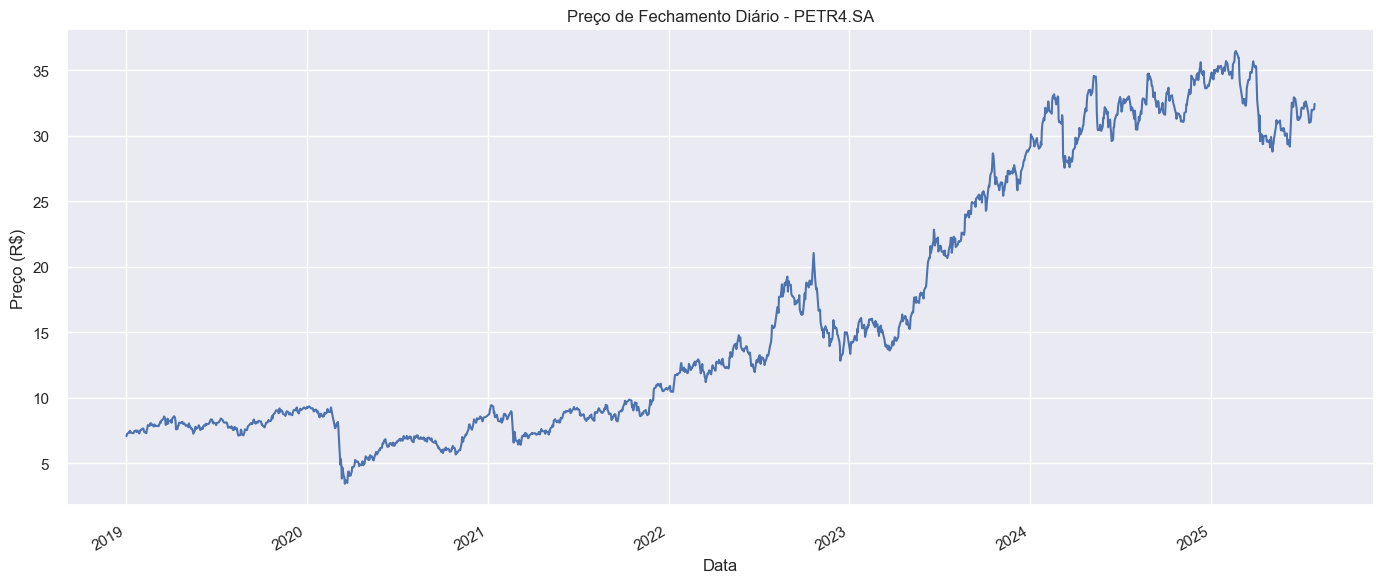

In [39]:
# Visualização gráfica do preço de fechamento
df['Close'].plot(title=f"Preço de Fechamento Diário - {ticker}")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.tight_layout()
plt.show()

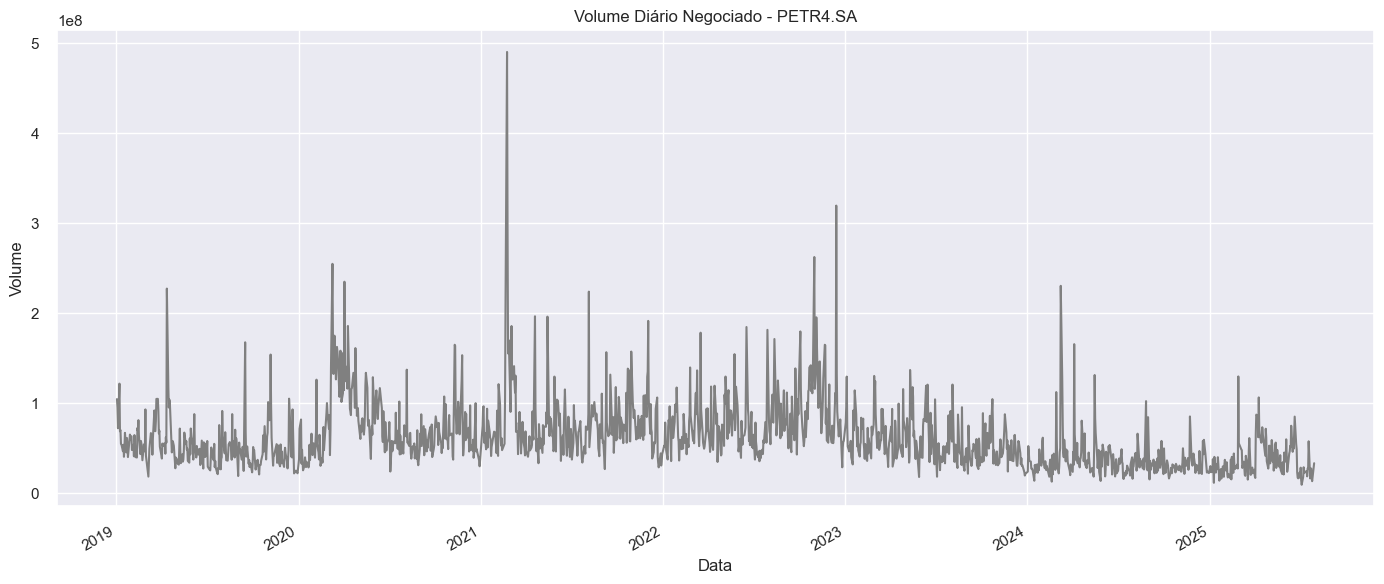

In [40]:
# Plot de volume negociado
df['Volume'].plot(title=f"Volume Diário Negociado - {ticker}", color='gray')
plt.xlabel("Data")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()


🔗 Matriz de correlação:
            Open      High       Low     Close    Volume
Open    1.000000  0.999804  0.999794  0.999558 -0.391980
High    0.999804  1.000000  0.999748  0.999799 -0.385933
Low     0.999794  0.999748  1.000000  0.999816 -0.398526
Close   0.999558  0.999799  0.999816  1.000000 -0.392356
Volume -0.391980 -0.385933 -0.398526 -0.392356  1.000000


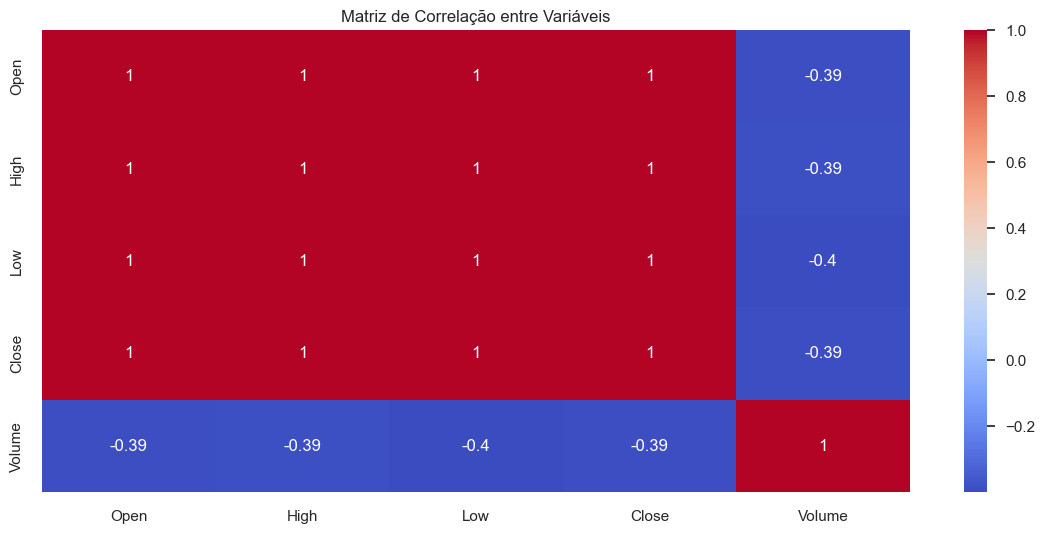

In [41]:
# Correlação entre variáveis
print("\n🔗 Matriz de correlação:")
correlation = df.corr()
print(correlation)
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação entre Variáveis")
plt.show()

In [ ]:
# Salvando o DataFrame limpo para o próximo notebook
df.to_parquet('../data/dados_petr4.parquet')
print("\n✅ Dados salvos em 'dados_petr4.parquet' para modelagem.")



✅ Dados salvos em 'dados_petr4.parquet' para modelagem.
